In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('chained_data.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head()

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter(Marketing),0,1,0,1
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad(Content_page),0,1,0,2
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube(Product_support),0,1,0,3
3,OPP_0,2018-08-28 21:16:20+00:00,Website(Product_page),0,1,0,4
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,16


In [3]:
data.isna().sum()

Opportunity_ID       0
Timestamp            0
Opportunity_stage    0
conversions          0
market_stage         0
sales_stage          0
visit                0
dtype: int64

In [4]:
data['qualified'] = 0
qualified_list = (data.Opportunity_stage == 'Lead qualified') 
data.loc[qualified_list, 'qualified'] = 1

In [5]:
data

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit,qualified
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter(Marketing),0,1,0,1,0
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad(Content_page),0,1,0,2,0
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube(Product_support),0,1,0,3,0
3,OPP_0,2018-08-28 21:16:20+00:00,Website(Product_page),0,1,0,4,0
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,16,0
...,...,...,...,...,...,...,...,...
619112,OPP_99998,2018-07-22 09:59:59+00:00,Email(Support),0,1,0,11,0
619113,OPP_99998,2018-07-23 07:40:12+00:00,Email(Support),0,1,0,12,0
619114,OPP_99998,2018-07-23 08:40:43+00:00,LinkedIn ad(Webinar/Conference),0,1,0,13,0
619115,OPP_99998,2018-07-29 10:56:07+00:00,Website(Corporate_page),0,1,0,14,0


In [6]:
data['qualified'].value_counts()

0    586473
1     32644
Name: qualified, dtype: int64

In [7]:
data['conversions'].value_counts()

0    615820
1      3297
Name: conversions, dtype: int64

In [11]:
df = data.sort_values(['Opportunity_ID','Timestamp'], ascending=[False,True])
df

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit,qualified
619116,OPP_99999,2018-07-26 14:28:00+00:00,Website(Corporate_page),0,1,0,1,0
619102,OPP_99998,2018-07-02 09:42:58+00:00,Email(Support),0,1,0,1,0
619103,OPP_99998,2018-07-02 13:41:50+00:00,Email(Support),0,1,0,2,0
619104,OPP_99998,2018-07-03 07:14:35+00:00,Email(Support),0,1,0,3,0
619105,OPP_99998,2018-07-04 11:46:46+00:00,Email(Support),0,1,0,4,0
...,...,...,...,...,...,...,...,...
3,OPP_0,2018-08-28 21:16:20+00:00,Website(Product_page),0,1,0,4,0
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,16,0
5,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,17,1
6,OPP_0,2019-03-22 21:16:20+00:00,Connect call,0,0,1,18,0


In [11]:
df['visit'] = df.groupby('Opportunity_ID').cumcount() + 1
df

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit,qualified
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter(Marketing),0,1,0,1,0
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad(Content_page),0,1,0,2,0
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube(Product_support),0,1,0,3,0
3,OPP_0,2018-08-28 21:16:20+00:00,Website(Product_page),0,1,0,4,0
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,5,0
...,...,...,...,...,...,...,...,...
619112,OPP_99998,2018-07-22 09:59:59+00:00,Email(Support),0,1,0,11,0
619113,OPP_99998,2018-07-23 07:40:12+00:00,Email(Support),0,1,0,12,0
619114,OPP_99998,2018-07-23 08:40:43+00:00,LinkedIn ad(Webinar/Conference),0,1,0,13,0
619115,OPP_99998,2018-07-29 10:56:07+00:00,Website(Corporate_page),0,1,0,14,0


In [12]:
df[df['Opportunity_ID'] == 'OPP_0']

,Opportunity_ID,Timestamp,Opportunity_stage,conversions,market_stage,sales_stage,visit,qualified
0,OPP_0,2018-07-05 21:16:20+00:00,Email newsletter(Marketing),0,1,0,1,0
1,OPP_0,2018-07-22 21:16:20+00:00,LinkedIn ad(Content_page),0,1,0,2,0
2,OPP_0,2018-08-06 21:16:20+00:00,YouTube(Product_support),0,1,0,3,0
3,OPP_0,2018-08-28 21:16:20+00:00,Website(Product_page),0,1,0,4,0
4,OPP_0,2019-02-17 21:16:20+00:00,Enquiry,0,0,1,5,0
5,OPP_0,2019-03-13 21:16:20+00:00,Lead qualified,0,0,1,6,1
6,OPP_0,2019-03-22 21:16:20+00:00,Connect call,0,0,1,7,0
7,OPP_0,2019-04-12 21:16:20+00:00,Discovery call,0,0,1,8,0


In [13]:
paths = data.groupby('Opportunity_ID')['Opportunity_stage'].aggregate(lambda x: x.tolist()).reset_index()
paths

,Opportunity_ID,Opportunity_stage
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
...,...,...
130003,OPP_99995,"[Email(Support), Email(Support)]"
130004,OPP_99996,[YouTube(Announcements)]
130005,OPP_99997,[Website(Corporate_page)]
130006,OPP_99998,"[Email(Support), Email(Support), Email(Support..."


In [14]:
paths['qualified'] = 0
for i in range(len(paths)):
    if 'Lead qualified' in paths.loc[i, 'Opportunity_stage']:
        paths.loc[i,'qualified'] = 1

    else:
        paths.loc[i,'qualified'] = 0

In [15]:
paths['conversion'] = 0
for i in range(len(paths)):
    if 'Contract signed' in paths.loc[i, 'Opportunity_stage']:
        paths.loc[i,'conversion'] = 1

    else:
        paths.loc[i,'conversion'] = 0

In [16]:
sales_channels = ['Enquiry','Lead qualified','Connect call','Discovery call','Demonstration','Stakeholders buy in','Negotiation','Contract signed']
paths['market_chan'] = ''
for i in range(len(paths)):
    paths['market_chan'].loc[i] = [j for j in paths.loc[i,'Opportunity_stage'] if j not in sales_channels]

paths

c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Opportunity_ID,Opportunity_stage,qualified,conversion,market_chan
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont..."
...,...,...,...,...,...
130003,OPP_99995,"[Email(Support), Email(Support)]",0,0,"[Email(Support), Email(Support)]"
130004,OPP_99996,[YouTube(Announcements)],0,0,[YouTube(Announcements)]
130005,OPP_99997,[Website(Corporate_page)],0,0,[Website(Corporate_page)]
130006,OPP_99998,"[Email(Support), Email(Support), Email(Support...",0,0,"[Email(Support), Email(Support), Email(Support..."


In [17]:
paths['market_chan'].loc[0]

['Email newsletter(Marketing)',
 'LinkedIn ad(Content_page)',
 'YouTube(Product_support)',
 'Website(Product_page)']

In [18]:
paths['path'] = ''
for i in range(len(paths)):
    if paths['conversion'].loc[i] == 1:
        paths['path'].loc[i] = ['Start'] + paths['market_chan'].loc[i] + ['Conversion']

    else:
        paths['path'].loc[i] = ['Start'] + paths['market_chan'].loc[i] + ['Null']


c:\Users\Toshiba\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
paths['conversion'].value_counts()

0    126711
1      3297
Name: conversion, dtype: int64

In [20]:
paths['path'].loc[0]

['Start',
 'Email newsletter(Marketing)',
 'LinkedIn ad(Content_page)',
 'YouTube(Product_support)',
 'Website(Product_page)',
 'Null']

In [21]:
paths

,Opportunity_ID,Opportunity_stage,qualified,conversion,market_chan,path
0,OPP_0,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Start, Email newsletter(Marketing), LinkedIn ..."
1,OPP_1,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Start, Email newsletter(Marketing), LinkedIn ..."
2,OPP_10,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Start, Email newsletter(Marketing), LinkedIn ..."
3,OPP_100,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Start, Email newsletter(Marketing), LinkedIn ..."
4,OPP_1000,"[Email newsletter(Marketing), LinkedIn ad(Cont...",1,0,"[Email newsletter(Marketing), LinkedIn ad(Cont...","[Start, Email newsletter(Marketing), LinkedIn ..."
...,...,...,...,...,...,...
130003,OPP_99995,"[Email(Support), Email(Support)]",0,0,"[Email(Support), Email(Support)]","[Start, Email(Support), Email(Support), Null]"
130004,OPP_99996,[YouTube(Announcements)],0,0,[YouTube(Announcements)],"[Start, YouTube(Announcements), Null]"
130005,OPP_99997,[Website(Corporate_page)],0,0,[Website(Corporate_page)],"[Start, Website(Corporate_page), Null]"
130006,OPP_99998,"[Email(Support), Email(Support), Email(Support...",0,0,"[Email(Support), Email(Support), Email(Support...","[Start, Email(Support), Email(Support), Email(..."


In [22]:
#req = [['Email newsletter(Marketing)', 'LinkedIn ad(linkedin post)', 'YouTube(Product_support)', 'Website(Product_page)'], ['Google ad(Display_ad_campaign)', 'YouTube(Product_support)', 'Website(Product_page)'],['Google ad(Display_ad_campaign)', 'Email newsletter(Marketing)', 'Website(Product_page)']]
ran = paths[paths['conversion'] == 1]
#ran = ran[ran.market_chan.isin(req)]
df_paths = ran[['Opportunity_ID', 'path']]
df_paths

,Opportunity_ID,path
5,OPP_10000,"[Start, Google ad(Display_ad_campaign), YouTub..."
71,OPP_10006,"[Start, Email newsletter(Marketing), LinkedIn ..."
116,OPP_10010,"[Start, Email newsletter(Marketing), LinkedIn ..."
215,OPP_10019,"[Start, Google ad(Display_ad_campaign), YouTub..."
226,OPP_1002,"[Start, Google ad(Display_ad_campaign), Email ..."
...,...,...
129643,OPP_9967,"[Start, Customer referral, Email(Support), Ema..."
129654,OPP_9968,"[Start, YouTube(Announcements), LinkedIn ad(We..."
129832,OPP_9984,"[Start, LinkedIn ad(Webinar/Conference), Googl..."
129843,OPP_9985,"[Start, Website(Corporate_page), Website(Corpo..."


In [23]:
list_of_paths = df_paths['path']
total_converted = sum(path.count('Conversion') for path in df_paths['path'].tolist())
base_converted_rate = total_converted / len(list_of_paths)

base_converted_rate

1.0

In [24]:
def transition_states(list_of_paths):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    transition_states = {x + '>' + y: 0 for x in list_of_unique_channels for y in list_of_unique_channels}

    for possible_state in list_of_unique_channels:
        if possible_state not in ['Conversion', 'Null']:
            for user_path in list_of_paths:
                if possible_state in user_path:
                    indices = [i for i, s in enumerate(user_path) if possible_state in s]
                    for col in indices:
                        transition_states[user_path[col] + '>' + user_path[col + 1]] += 1

    return transition_states


trans_states = transition_states(list_of_paths)

In [25]:
unique_channels = set(x for element in list_of_paths for x in element)
unique_channels

{'Conference(Booth)',
 'Conference(Conventions)',
 'Conversion',
 'Customer referral',
 'Email newsletter(Marketing)',
 'Email newsletter(Product)',
 'Email(Support)',
 'Google ad(Display_ad_campaign)',
 'Google ad(Product)',
 'Google ad(Webinar/Conference)',
 'LinkedIn ad(Content_page)',
 'LinkedIn ad(Webinar/Conference)',
 'LinkedIn ad(linkedin post)',
 'Published article(Financial_times)',
 'Published article(Forbes_magazine)',
 'Published article(Wallstreet_journal)',
 'Start',
 'Website(Corporate_page)',
 'Website(Product_page)',
 'Website(Support_pages)',
 'Website(Webinar/Conference_pages)',
 'YouTube(Announcements)',
 'YouTube(Conference_related)',
 'YouTube(Product_support)'}

In [26]:
from collections import defaultdict
def transition_prob(trans_dict):
    list_of_unique_channels = set(x for element in list_of_paths for x in element)
    trans_prob = defaultdict(dict)
    for state in list_of_unique_channels:
        if state not in ['Conversion', 'Null']:
            counter = 0
            index = [i for i, s in enumerate(trans_dict) if state + '>' in s]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    counter += trans_dict[list(trans_dict)[col]]
            for col in index:
                if trans_dict[list(trans_dict)[col]] > 0:
                    state_prob = float((trans_dict[list(trans_dict)[col]])) / float(counter)
                    trans_prob[list(trans_dict)[col]] = state_prob

    return trans_prob


trans_prob = transition_prob(trans_states)

In [27]:
def transition_matrix(list_of_paths, transition_probabilities):
    trans_matrix = pd.DataFrame()
    list_of_unique_channels = set(x for element in list_of_paths for x in element)

    for channel in list_of_unique_channels:
        trans_matrix[channel] = 0.00
        trans_matrix.loc[channel] = 0.00
        trans_matrix.loc[channel][channel] = 1.0 if channel in ['Conversion', 'Null'] else 0.0

    for key, value in transition_probabilities.items():
        origin, destination = key.split('>')
        trans_matrix.at[origin, destination] = value

    return trans_matrix


trans_matrix = transition_matrix(list_of_paths, trans_prob)

In [28]:
trans_matrix


,Google ad(Webinar/Conference),Website(Corporate_page),Conference(Conventions),Published article(Forbes_magazine),LinkedIn ad(Content_page),Google ad(Display_ad_campaign),Conference(Booth),Google ad(Product),Start,Email newsletter(Product),...,Website(Product_page),YouTube(Announcements),Website(Webinar/Conference_pages),Published article(Wallstreet_journal),Conversion,Email(Support),LinkedIn ad(Webinar/Conference),YouTube(Product_support),LinkedIn ad(linkedin post),Customer referral
Google ad(Webinar/Conference),0.285714,0.142857,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.142857,0.000000,0.00000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000
Website(Corporate_page),0.068966,0.137931,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.241379,0.000000,0.00000,0.310345,0.137931,0.103448,0.000000,0.000000,0.000000
Conference(Conventions),0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.00000,0.000000,0.0,0.400000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
Published article(Forbes_magazine),0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.00000,0.142857,0.0,0.285714,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000
LinkedIn ad(Content_page),0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00000,0.000000,0.0,0.000000,...,0.000000,0.047619,0.238095,0.00000,0.190476,0.142857,0.000000,0.000000,0.000000,0.000000
Google ad(Display_ad_campaign),0.000000,0.000000,0.000000,0.000000,0.000000,0.047389,0.00000,0.000000,0.0,0.042553,...,0.029014,0.000000,0.000484,0.00000,0.000000,0.000000,0.000000,0.440522,0.042070,0.000000
Conference(Booth),0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.333333,0.0,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
Google ad(Product),0.000000,0.041667,0.000000,0.000000,0.083333,0.000000,0.00000,0.208333,0.0,0.000000,...,0.000000,0.041667,0.083333,0.00000,0.000000,0.375000,0.083333,0.000000,0.000000,0.000000
Start,0.001213,0.001213,0.001517,0.002123,0.001820,0.593267,0.00091,0.003640,0.0,0.046709,...,0.015469,0.000910,0.000607,0.00273,0.000000,0.002123,0.001213,0.002123,0.008796,0.002123
Email newsletter(Product),0.000000,0.000000,0.000000,0.000000,0.000000,0.003610,0.00000,0.000000,0.0,0.120939,...,0.115523,0.000000,0.000000,0.00000,0.277978,0.000000,0.000000,0.243682,0.222022,0.000000


In [29]:
trans_matrix.to_csv('transistion_probab.csv')

<AxesSubplot:>

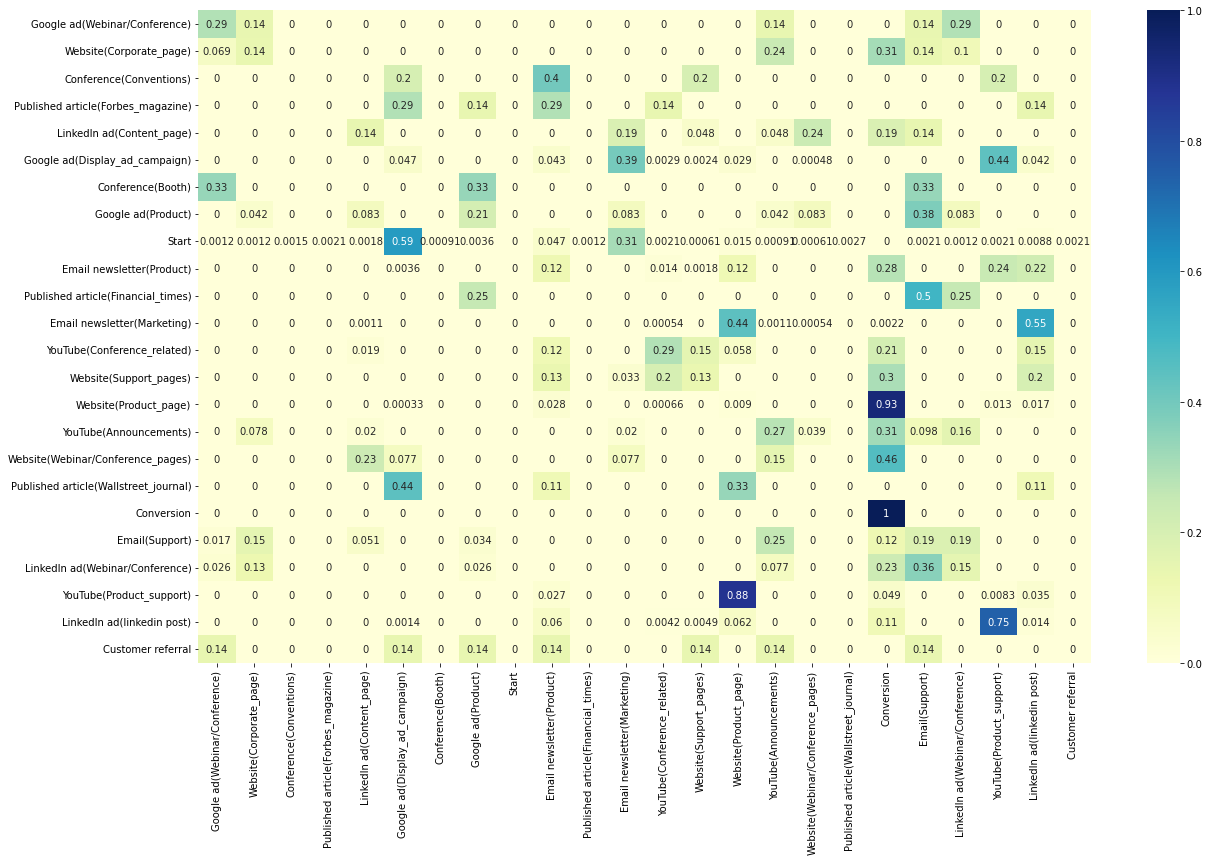

In [30]:
plt.figure(figsize = (20,12))
sns.heatmap(trans_matrix, cmap="YlGnBu", annot = True)

In [31]:
channels = [channel for channel in trans_matrix.columns if channel not in ['Start','Null','Conversion']]
channels

['Google ad(Webinar/Conference)',
 'Website(Corporate_page)',
 'Conference(Conventions)',
 'Published article(Forbes_magazine)',
 'LinkedIn ad(Content_page)',
 'Google ad(Display_ad_campaign)',
 'Conference(Booth)',
 'Google ad(Product)',
 'Email newsletter(Product)',
 'Published article(Financial_times)',
 'Email newsletter(Marketing)',
 'YouTube(Conference_related)',
 'Website(Support_pages)',
 'Website(Product_page)',
 'YouTube(Announcements)',
 'Website(Webinar/Conference_pages)',
 'Published article(Wallstreet_journal)',
 'Email(Support)',
 'LinkedIn ad(Webinar/Conference)',
 'YouTube(Product_support)',
 'LinkedIn ad(linkedin post)',
 'Customer referral']

In [32]:
len(channels)

22

In [33]:
a = dict(trans_matrix.loc['Start'])
b = [i for i in list(a.items()) if i[0] in channels]
b = dict(b)

In [34]:
d = {}
for i in channels:
    c = dict(trans_matrix.loc[i])
    c = [j for j in list(c.items()) if j[0] in channels]
    c = dict(c)
    d[i] = c

print(len(d))

22


In [35]:
e = trans_matrix[['Conversion']].drop(['Start','Conversion'], axis = 0)
e1 = {}
for i in channels:
    e1[i] = dict(e.loc[i])

e1

{'Google ad(Webinar/Conference)': {'Conversion': 0.0},
 'Website(Corporate_page)': {'Conversion': 0.3103448275862069},
 'Conference(Conventions)': {'Conversion': 0.0},
 'Published article(Forbes_magazine)': {'Conversion': 0.0},
 'LinkedIn ad(Content_page)': {'Conversion': 0.19047619047619047},
 'Google ad(Display_ad_campaign)': {'Conversion': 0.0},
 'Conference(Booth)': {'Conversion': 0.0},
 'Google ad(Product)': {'Conversion': 0.0},
 'Email newsletter(Product)': {'Conversion': 0.2779783393501805},
 'Published article(Financial_times)': {'Conversion': 0.0},
 'Email newsletter(Marketing)': {'Conversion': 0.0021798365122615805},
 'YouTube(Conference_related)': {'Conversion': 0.21153846153846154},
 'Website(Support_pages)': {'Conversion': 0.3},
 'Website(Product_page)': {'Conversion': 0.9316749585406302},
 'YouTube(Announcements)': {'Conversion': 0.3137254901960784},
 'Website(Webinar/Conference_pages)': {'Conversion': 0.46153846153846156},
 'Published article(Wallstreet_journal)': {'Conv

In [36]:
observations = ("Conversion","Conversion","Conversion","Conversion")
states = tuple(channels)
start_p = b
trans_p = d
emit_p = e1

In [37]:
b

{'Google ad(Webinar/Conference)': 0.001213224143160449,
 'Website(Corporate_page)': 0.001213224143160449,
 'Conference(Conventions)': 0.001516530178950561,
 'Published article(Forbes_magazine)': 0.0021231422505307855,
 'LinkedIn ad(Content_page)': 0.0018198362147406734,
 'Google ad(Display_ad_campaign)': 0.5932666060054596,
 'Conference(Booth)': 0.0009099181073703367,
 'Google ad(Product)': 0.003639672429481347,
 'Email newsletter(Product)': 0.04670912951167728,
 'Published article(Financial_times)': 0.001213224143160449,
 'Email newsletter(Marketing)': 0.3075523202911738,
 'YouTube(Conference_related)': 0.0021231422505307855,
 'Website(Support_pages)': 0.0006066120715802245,
 'Website(Product_page)': 0.015468607825295723,
 'YouTube(Announcements)': 0.0009099181073703367,
 'Website(Webinar/Conference_pages)': 0.0006066120715802245,
 'Published article(Wallstreet_journal)': 0.00272975432211101,
 'Email(Support)': 0.0021231422505307855,
 'LinkedIn ad(Webinar/Conference)': 0.0012132241431

In [38]:
def dptable(V):
     
    yield " ".join(("%12d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%f" % v[state]["prob"]) for v in V)


In [41]:
def viterbi_algorithm(observations, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        #print(st)
        V[0][st] = {"prob": start_p[st] * emit_p[st][observations[0]], "prev": None}
    #print(V)
    for t in range(1, len(observations)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1][states[0]]["prob"] * trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1][prev_st]["prob"] * trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st

 
            max_prob = max_tr_prob * emit_p[st][observations[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
    #print(V)
    for line in dptable(V):
        print(line)
    
        opt = []
        max_prob = 0.0
        best_st = None
    #print(dptable(V))
    for st, data in V[-1].items():
        if data["prob"] > max_prob:
            max_prob = data["prob"]
            best_st = st
    opt.append(best_st)
    previous = best_st
    
    
    for t in range(len(V) - 2, -1, -1):
        opt.insert(0, V[t + 1][previous]["prev"])
        previous = V[t + 1][previous]["prev"]

    print ("The steps of states are " + " ".join(opt) + " with highest probability of %s" % max_prob)

In [37]:
'''def viterbi_algorithm(observations, states, start_p, trans_p, emit_p):
    V = [{}]
    for st in states:
        V[0][st] = {"prob": start_p[st] * emit_p[st][observations[0]], "prev": None}
    #print(V)
    for t in range(1, len(observations)):
        V.append({})
        for st in states:
            max_tr_prob = V[t - 1][states[0]]["prob"] * trans_p[states[0]][st]
            prev_st_selected = states[0]
            for prev_st in states[1:]:
                tr_prob = V[t - 1][prev_st]["prob"] * trans_p[prev_st][st]
                if tr_prob > max_tr_prob:
                    max_tr_prob = tr_prob
                    prev_st_selected = prev_st
 
            max_prob = max_tr_prob * emit_p[st][observations[t]]
            V[t][st] = {"prob": max_prob, "prev": prev_st_selected}
    #print(V[-1])
    for line in dptable(V):
        print(line)
    
        opt = []
        max_prob = 0.0
        best_st = None
    
    new = list(V[-1].items())
    new.sort(key=lambda x:x[1]['prob'], reverse = True)
    #print(new)
    for st, data in new[:10]:
            opt.append([st,data["prev"],data['prob']])
    #print(opt)
   
    for i in opt:
        print ("The steps of states are " + " ".join(i[:-1]) + " with highest probability of %s" % i[-1])'''

In [42]:
viterbi_algorithm(observations, states, start_p, trans_p, emit_p)

           0            1            2            3
Google : 0.00000 0.00000 0.00000 0.00000
Website: 0.00037 0.00001 0.00000 0.00000
Confere: 0.00000 0.00000 0.00000 0.00000
Publish: 0.00000 0.00000 0.00000 0.00000
LinkedI: 0.00034 0.00001 0.00000 0.00000
Google : 0.00000 0.00000 0.00000 0.00000
Confere: 0.00000 0.00000 0.00000 0.00000
Google : 0.00000 0.00000 0.00000 0.00000
Email n: 0.01298 0.00043 0.00001 0.00000
Publish: 0.00000 0.00000 0.00000 0.00000
Email n: 0.00067 0.00000 0.00000 0.00000
YouTube: 0.00044 0.00004 0.00000 0.00000
Website: 0.00018 0.00002 0.00000 0.00000
Website: 0.01441 0.00139 0.00012 0.00000
YouTube: 0.00028 0.00002 0.00000 0.00000
Website: 0.00028 0.00003 0.00000 0.00000
Publish: 0.00000 0.00000 0.00000 0.00000
Email(S: 0.00025 0.00001 0.00000 0.00000
LinkedI: 0.00028 0.00001 0.00000 0.00000
YouTube: 0.00010 0.00015 0.00001 0.00000
LinkedI: 0.00094 0.00031 0.00001 0.00000
Custome: 0.00000 0.00000 0.00000 0.00000
The steps of states are Email newsletter(Produ

In [282]:
a = np.array(trans_matrix[[i for i in channels]].drop(['Start','Conversion'], axis = 0))
b = np.array(trans_matrix[['Conversion']].drop(['Start','Conversion'], axis = 0))
pi = np.array(trans_matrix.loc['Start'].drop(['Start','Conversion'],axis=0))

In [283]:
sequence = np.array([0])

In [258]:
pi.shape

(5,)

In [259]:
b

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [74]:
def viterbi():
    store = np.zeros((sequence.shape[0],a.shape[0]))
    track = np.zeros((sequence.shape[0], a.shape[0]), 'int')
    store[0, :] = pi * b[:,sequence[0]] #calculating first column
    for t in range(1, sequence.shape[0]): #recursion
        for s2 in range(3):
            for s1 in range(3):
                score = store[t-1, s1] * a[s1, s2] * b[s2, sequence[t]] 
                if score > store[t, s2]: #checking max condition
                    store[t, s2] = score
                    track[t, s2] = s1
    follow = []
    follow.append(np.argmax(store[sequence.shape[0]-1,:]))
    for i in range(sequence.shape[0]-1, 0, -1):
        follow.append(track[i, follow[-1]])
    final=[states[i] for i in list(reversed(follow))]
    print("The calculation matrix is (columwise forward) \n", store.T)
    print("The probability is",max(store[sequence.shape[0]-1,:]))
    print("Optimal sequence:",final)


In [261]:
viterbi()

The calculation matrix is (columwise forward) 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
The probability is 0.0
Optimal sequence: ['Google ad(Display_ad_campaign)']


In [142]:
B[:, y[0]]

array([0., 0., 0., 0., 1.])

In [148]:
viterbi_algorithm(observations, states, start_p, trans_p, emit_p)

           0            1
Google : 0.00000 0.00000
YouTube: 0.00000 0.00000
Email n: 0.00000 0.00000
LinkedI: 0.00000 0.00000
Website: 0.00000 0.00000


KeyError: None

In [88]:
emit_p

{'Google ad(Display_ad_campaign)': {'Conversion': 0.0},
 'YouTube(Product_support)': {'Conversion': 0.0},
 'Email newsletter(Marketing)': {'Conversion': 0.0},
 'LinkedIn ad(linkedin post)': {'Conversion': 0.0},
 'Website(Product_page)': {'Conversion': 1.0}}

In [29]:
def removal_effects(df, conversion_rate):
    removal_effects_dict = {}
    channels = [channel for channel in df.columns if channel not in ['Start',
                                                                     'Null',
                                                                     'Conversion']]
    for channel in channels:
        removal_df = df.drop(channel, axis=1).drop(channel, axis=0)
        for column in removal_df.columns:
            row_sum = np.sum(list(removal_df.loc[column]))
            null_pct = float(1) - row_sum
            if null_pct != 0:
                removal_df.loc[column]['Null'] = null_pct
            removal_df.loc['Null']['Null'] = 1.0

        removal_to_conv = removal_df[
            ['Null', 'Conversion']].drop(['Null', 'Conversion'], axis=0)
        removal_to_non_conv = removal_df.drop(
            ['Null', 'Conversion'], axis=1).drop(['Null', 'Conversion'], axis=0)

        removal_inv_diff = np.linalg.inv(
            np.identity(
                len(removal_to_non_conv.columns)) - np.asarray(removal_to_non_conv))
        removal_dot_prod = np.dot(removal_inv_diff, np.asarray(removal_to_conv))
        removal_cvr = pd.DataFrame(removal_dot_prod,
                                   index=removal_to_conv.index)[[1]].loc['Start'].values[0]
        removal_effect = 1 - removal_cvr / conversion_rate
        removal_effects_dict[channel] = removal_effect

    return removal_effects_dict


removal_effects_dict = removal_effects(trans_matrix, base_converted_rate)


In [30]:
def markov_chain_allocations(removal_effects, total_conversions):
    re_sum = np.sum(list(removal_effects.values()))

    return {k: (v / re_sum) * total_conversions for k, v in removal_effects.items()}


attributions = markov_chain_allocations(removal_effects_dict, total_converted)

In [31]:
total_converted

3297

In [32]:
attributions

{'LinkedIn ad(linkedin post)': 110.68405623739727,
 'Conference(Booth)': 0.8966577954570021,
 'YouTube(Product_support)': 779.1157478476387,
 'Email newsletter(Marketing)': 625.3985225114369,
 'Customer referral': 4.320630429762991,
 'Website(Product_page)': 782.5792080010493,
 'Google ad(Display_ad_campaign)': 202.8858360985534,
 'LinkedIn ad(Webinar/Conference)': 43.991762502274995,
 'Conference(Conventions)': 6.170016359644877,
 'Google ad(Product)': 11.40991062722009,
 'Published article(Financial_times)': 1.1425389376938524,
 'Published article(Forbes_magazine)': 1.7097175707126846,
 'Website(Webinar/Conference_pages)': 5.932181900521025,
 'Google ad(Webinar/Conference)': 1.9927400140620626,
 'Email newsletter(Product)': 94.58660935863931,
 'Website(Corporate_page)': 6.166411690286544,
 'LinkedIn ad(Product)': 20.027469639143526,
 'Published article(Wallstreet_journal)': 7.372680577469918,
 'YouTube(Conference_related)': 10.33025191037812,
 'LinkedIn ad(Content_page)': 532.4905174

In [33]:
att = pd.DataFrame(list(attributions.items()))
att

,0,1
0,LinkedIn ad(linkedin post),110.684056
1,Conference(Booth),0.896658
2,YouTube(Product_support),779.115748
3,Email newsletter(Marketing),625.398523
4,Customer referral,4.320630
5,Website(Product_page),782.579208
6,Google ad(Display_ad_campaign),202.885836
7,LinkedIn ad(Webinar/Conference),43.991763
8,Conference(Conventions),6.170016
9,Google ad(Product),11.409911


In [34]:
att.to_csv('att.csv',index = False)

In [35]:
att = att.sort_values(by=[1], ascending=False)
att

,0,1
5,Website(Product_page),782.579208
2,YouTube(Product_support),779.115748
3,Email newsletter(Marketing),625.398523
19,LinkedIn ad(Content_page),532.490517
6,Google ad(Display_ad_campaign),202.885836
0,LinkedIn ad(linkedin post),110.684056
14,Email newsletter(Product),94.586609
7,LinkedIn ad(Webinar/Conference),43.991763
21,Email newsletter(Support),29.877292
16,LinkedIn ad(Product),20.027470


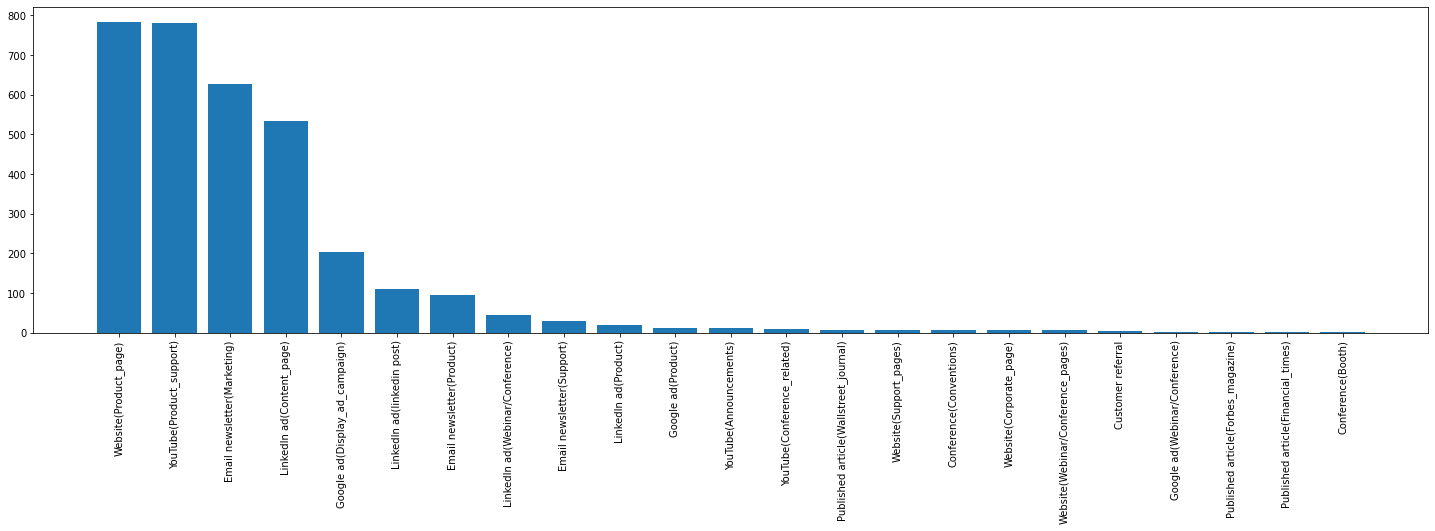

In [36]:
names = list(att[0])
values = list(att[1])
values.sort(reverse=True)
plt.figure(figsize=(25,6))
plt.bar(range(len(attributions)), values, tick_label = names)
plt.xticks(rotation = 90)
plt.show()